In [ ]:
import string
import re

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import pipeline
from matplotlib import pyplot as plt

## Download Data

In [ ]:
! wget https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv

--2023-05-18 17:45:49--  https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12989063 (12M) [text/plain]
Saving to: ‘dataset.csv.4’

dataset.csv.4       100%[===================>]  12.39M  --.-KB/s    in 0.08s   

2023-05-18 17:45:49 (156 MB/s) - ‘dataset.csv.4’ saved [12989063/12989063]



In [ ]:
df = pd.read_csv("dataset.csv", encoding="utf-8")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
languages_classes = df["language"].unique()
languages_classes

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [ ]:
print(f"Total tanguages: {len(languages_classes)}")

Total tanguages: 22


In [ ]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [ ]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


## Cleaning Data

In [ ]:
for char in string.punctuation:
  print(char, end=" ")
translate_dict = dict((ord(char), None) for char in string.punctuation)
print(translate_dict)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ {33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [ ]:
for index, record in df.iterrows():
  text_line = record["Text"]
  if len(text_line) != 0:
    # convert to lowercase
    text_line = text_line.lower()
    # remove all the digit in text
    text_line = re.sub(r"\d+", "", text_line)
    # remove puncuation mark in record
    text_line = text_line.translate(translate_dict)
    record["Text"] = text_line

In [ ]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
X_data, y_data = df.iloc[:, 0], df.iloc[:, 1]

# separate train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(f"Shape of X test: {X_test.shape}")
print(f"Shape of y test: {y_test.shape}")

Shape of X train: (19800,)
Shape of y train: (19800,)
Shape of X test: (2200,)
Shape of y test: (2200,)


## Vectoritation

In [ ]:
from sklearn import ensemble
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 1), analyzer="char")
grd_boost = ensemble.GradientBoostingClassifier()
pipe_vec_clf = pipeline.Pipeline([("vectorizer", vectorizer), ("grd_boost", grd_boost)])
pipe_vec_clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer='char')),
                ('grd_boost', GradientBoostingClassifier())])

In [ ]:
from sklearn import metrics
y_pred = pipe_vec_clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {acc:.2f}")

Accuracy: 96.91


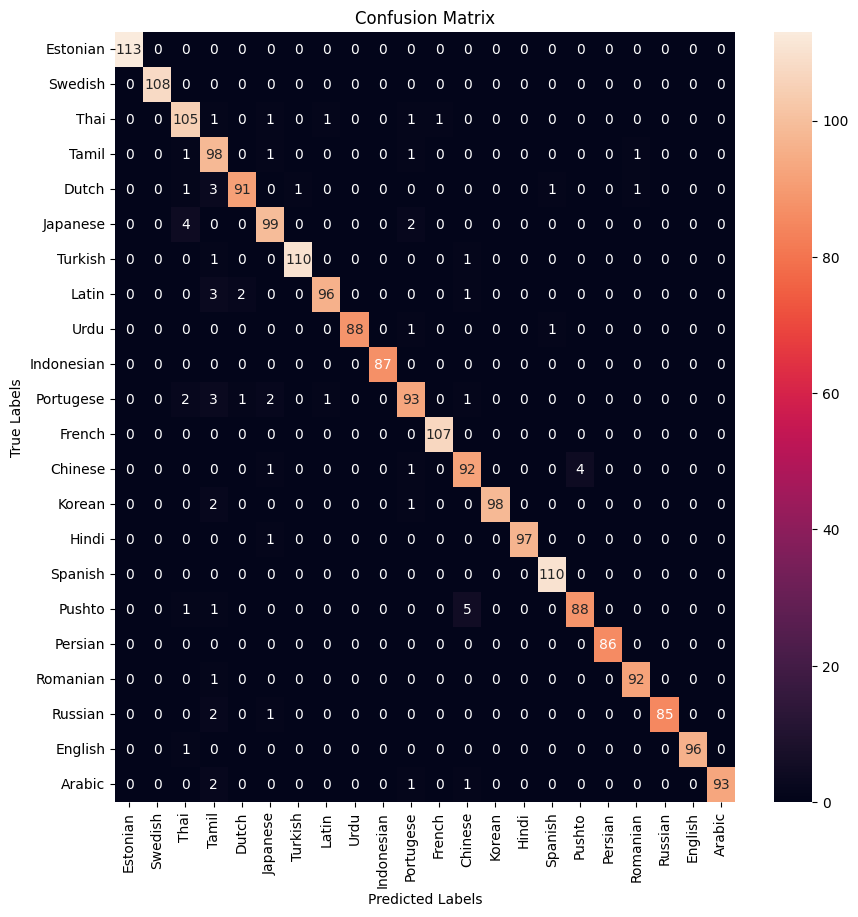

In [ ]:
cfm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, fmt="d", xticklabels=languages_classes, yticklabels=languages_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Save model

In [ ]:
import pickle
model_save= open("lang_detection.pickle", "wb")
pickle.dump(pipe_vec_clf, model_save)
model_save.close()

## Load model

In [ ]:
import pickle
with open("lang_detection.pickle", "rb") as file:
  model = pickle.load(file)


In [ ]:
import re
def detect_language(text):

  text = text.lower()
  # remove all the digit in text
  text = re.sub(r"\d+", "", text)
  predict_label = model.predict([text])
  # probability distribution of prediction
  predict_prob = model.predict_proba([text])
  print(predict_label)
  # return predict_label, predict_prob

In [ ]:
detect_language("Welcome to real sanjeev github repositiory.")
detect_language("உண்மையான சஞ்சீவ் கிதுப் களஞ்சியத்திற்கு வரவேற்கிறோம்.")
detect_language("असली संजीव जीथब रिपॉजिटरी में आपका स्वागत है।")
detect_language("Bienvenue dans le vrai dépôt github de Sanjeev.")

['English']
['Tamil']
['Hindi']
['French']
